In [789]:

import math
import sympy as sy
from scipy import constants
import re
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import sys
import time
import scipy as sp
from scipy.ndimage import gaussian_filter1d
import numpy as np
from scipy import integrate
from scipy.interpolate import interp2d
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import trapz
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize 
import matplotlib.cm as cm 
import matplotlib.path as mpath
import matplotlib.patches as mpatches 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # for making plots inside other plots 
from matplotlib import rc 
from joblib import Parallel, delayed
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman'] + plt.rcParams['font.serif']

In [791]:
tau=250
n_shift=401
wi_q1q2=3.056
wf_q1q2=3.55
wi_q4q5=3.056
wf_q4q5=3.55
mode_freq=[2.951,2.973,2.993,3.010,3.025,3.038,3.054]
#mode_freq=[2.951,0,0,0,0,0,0]
mode_freq=[mode_freq[i]*2*np.pi for i in range(len(mode_freq))]
param_ld=[[-0.001,-0.025,-0.040,0.045,-0.033,0.001,0.041],
          [0.030,0.048,0.031,-0.002,-0.028,0.03,0.028]
          ,[-0.052,-0.023,0.030,-0.032,0.002,0.031,0.022],
          [0.052,-0.038,-0.020,-0.035,0.018,0.034,0.019],
          [-0.023,0.047,-0.045,0.003,0.031,0.027,0.000]]



freq_q1q2=[]
freq_q4q5=[]
amp_q1q2=[]
amp_q4q5=[]

for i in np.arange(0,n_shift,1):
    with open(f'/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/generated_pulses/Fourier_Pulse_Q1_Q2_index{i}.txt','r') as file:
        file_content=file.readlines()
        freq_set=[2*np.pi*complex(file_content[j].strip().split(',')[0]) for j in range(len(file_content))]
        amp_set=[complex(file_content[j].strip().split(',')[1]) for j in range(len(file_content))]
        freq_q1q2.append(freq_set)
        amp_q1q2.append(amp_set)
  
for i in np.arange(0,n_shift,1):
    with open(f'/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/generated_pulses/Fourier_Pulse_Q4_Q5_index{i}.txt','r') as file:
        file_content=file.readlines()
        freq_set=[2*np.pi*complex(file_content[j].strip().split(',')[0]) for j in range(len(file_content))]
        amp_set=[complex(file_content[j].strip().split(',')[1]) for j in range(len(file_content))]
        freq_q4q5.append(freq_set)
        amp_q4q5.append(amp_set)

In [792]:
def sss_int(w1, w2, wp, Tau):
    if round(np.real(w1 * Tau / (2 * np.pi))) == round(np.real(w2 * Tau / (2 * np.pi))):
        x=((Tau * wp * (w1**2 - wp**2) + 2 * w1**2 * np.sin(Tau * wp)) / 
                 (2 * (w1**2 - wp**2)**2))
    else:
        x=-(w1 * w2 * np.sin(Tau * wp)) / ((w1**2 - wp**2) * (-w2**2 + wp**2))
    return x    

In [793]:
sss_int(freq_q1q2[0][1],freq_q1q2[0][1],mode_freq[0],250)

(85.85970478784073+0j)

In [627]:
# def sss_int(w1, w2, wp, Tau):
#     return -(w1 * w2 * np.sin(Tau * wp)) / ((w1**2 - wp**2) * (-w2**2 + wp**2))

In [794]:
t0=time.time()
chi=[]
for shift_index in range(n_shift):
    n1 = len(amp_q1q2[shift_index])
    n2 = len(amp_q4q5[shift_index])
    dmat = np.zeros((n1, n2),dtype=complex)

    for i in range(n1):
        for j in range(n2):
            w1=freq_q1q2[shift_index][i]
            w2=freq_q4q5[shift_index][j]
            dmat[i][j] = np.sum([param_ld[0][p]* param_ld[3][p]* sss_int(w1, w2, mode_freq[p], tau) for p in range(len(mode_freq))])
    chi.append((amp_q1q2[shift_index]@(dmat)@amp_q4q5[shift_index]))
    
    t1=time.time()
print(t1-t0)    

269.62787199020386


(2.608491556468944e-19+0j)

In [697]:
def fun(t):
    return np.sum([param_ld[0][p]*param_ld[3][p]*np.sin(mode_freq[p]*t) for p in range(len(mode_freq))])

/Users/masoudma/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


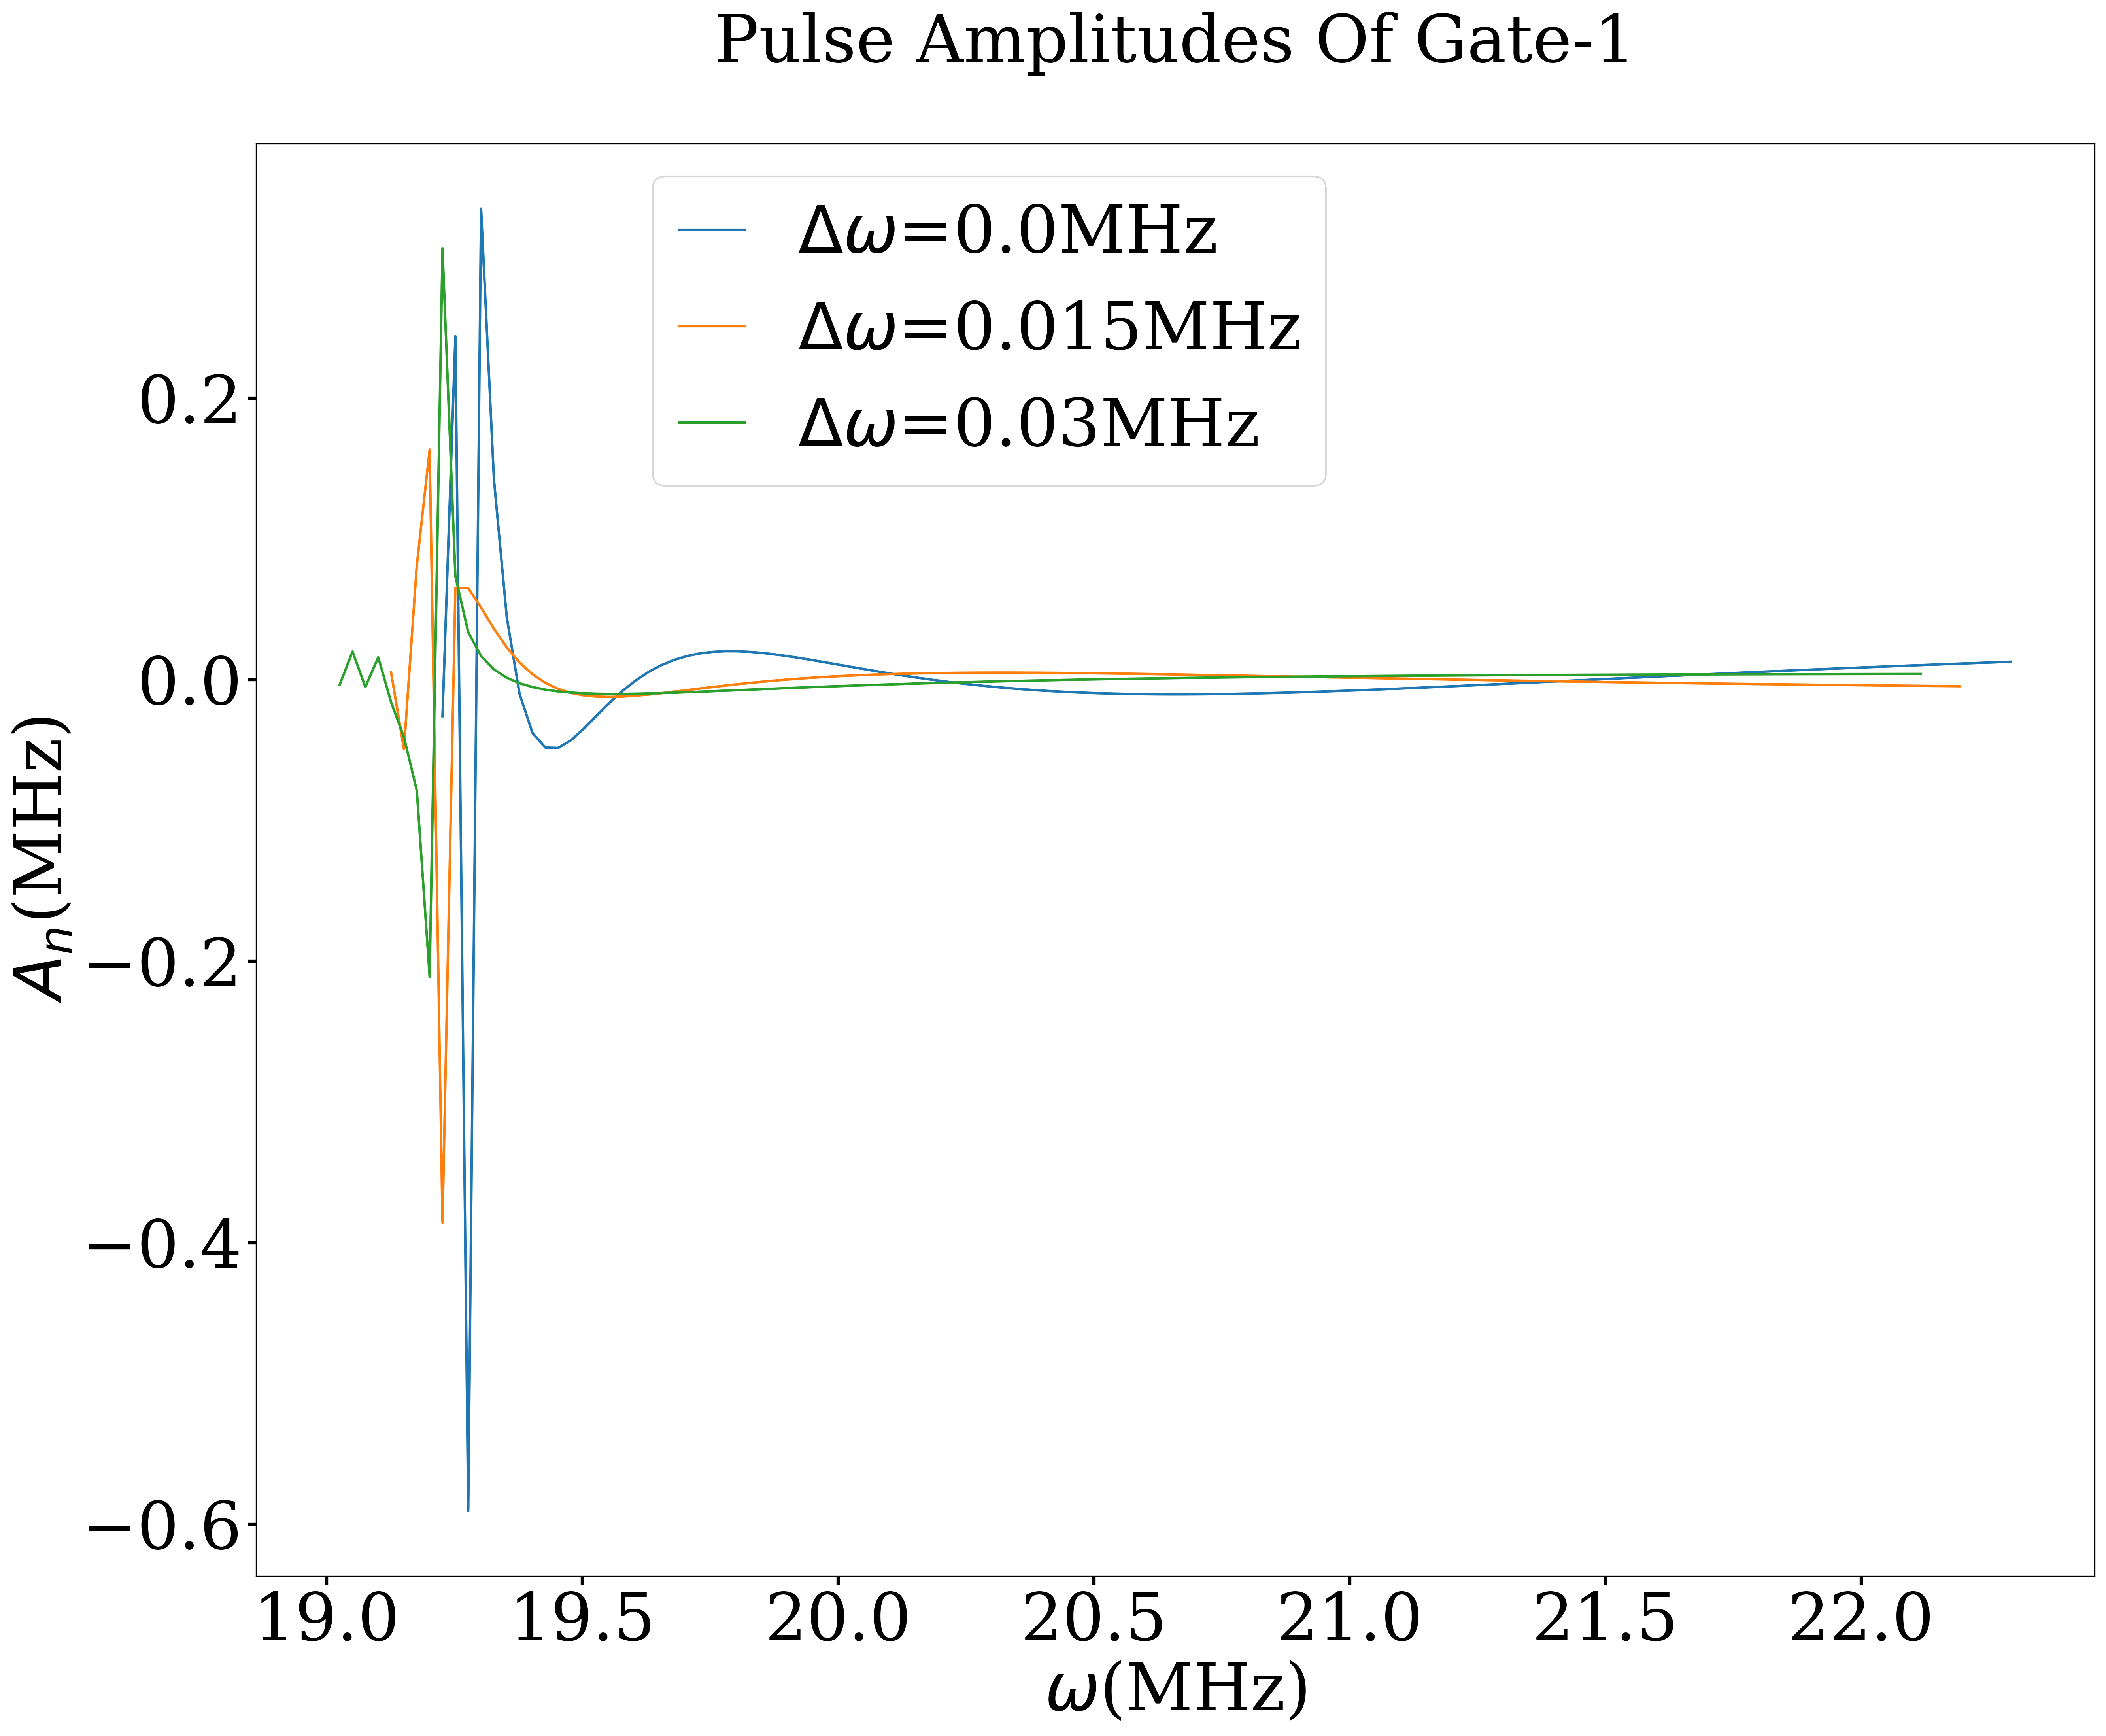

In [795]:
fnsz=40
plt.figure(figsize=(20, 16), dpi=300) 

for i in range(3):
    s=0.003*i*5
    plt.plot(freq_q1q2[i*5],amp_q1q2[i*5],label='$\Delta\omega$='+np.str0(s)+'MHz')

    

lines = plt.gca().get_lines()    
plt.gca().tick_params(axis='x', which='both', length=5, width=2)  # Adjust length and width as needed
plt.gca().tick_params(axis='y', which='both', length=5, width=2)  # Adjust length and width as needed

plt.tick_params(axis='both', which='major', labelsize=fnsz) 
plt.ylabel('$A_n$(MHz)', fontsize=fnsz)
plt.xlabel('$\omega$(MHz)', fontsize=fnsz)
plt.legend(fontsize=fnsz,loc='upper right', bbox_to_anchor=(0.6, 1.0), ncol=1, columnspacing=0.1,handlelength=1)
plt.title('Pulse Amplitudes Of Gate-1',fontsize=fnsz,loc='center',y=1.05)
#plt.xlim([3*10**8,1200*10**9])
#plt.ylim([1e22, 1.25e40])
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

save_dir='/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/Figures'
plt.savefig(os.path.join(save_dir,'amp_q1q2.png'), dpi=300, bbox_inches='tight') 
plt.show()

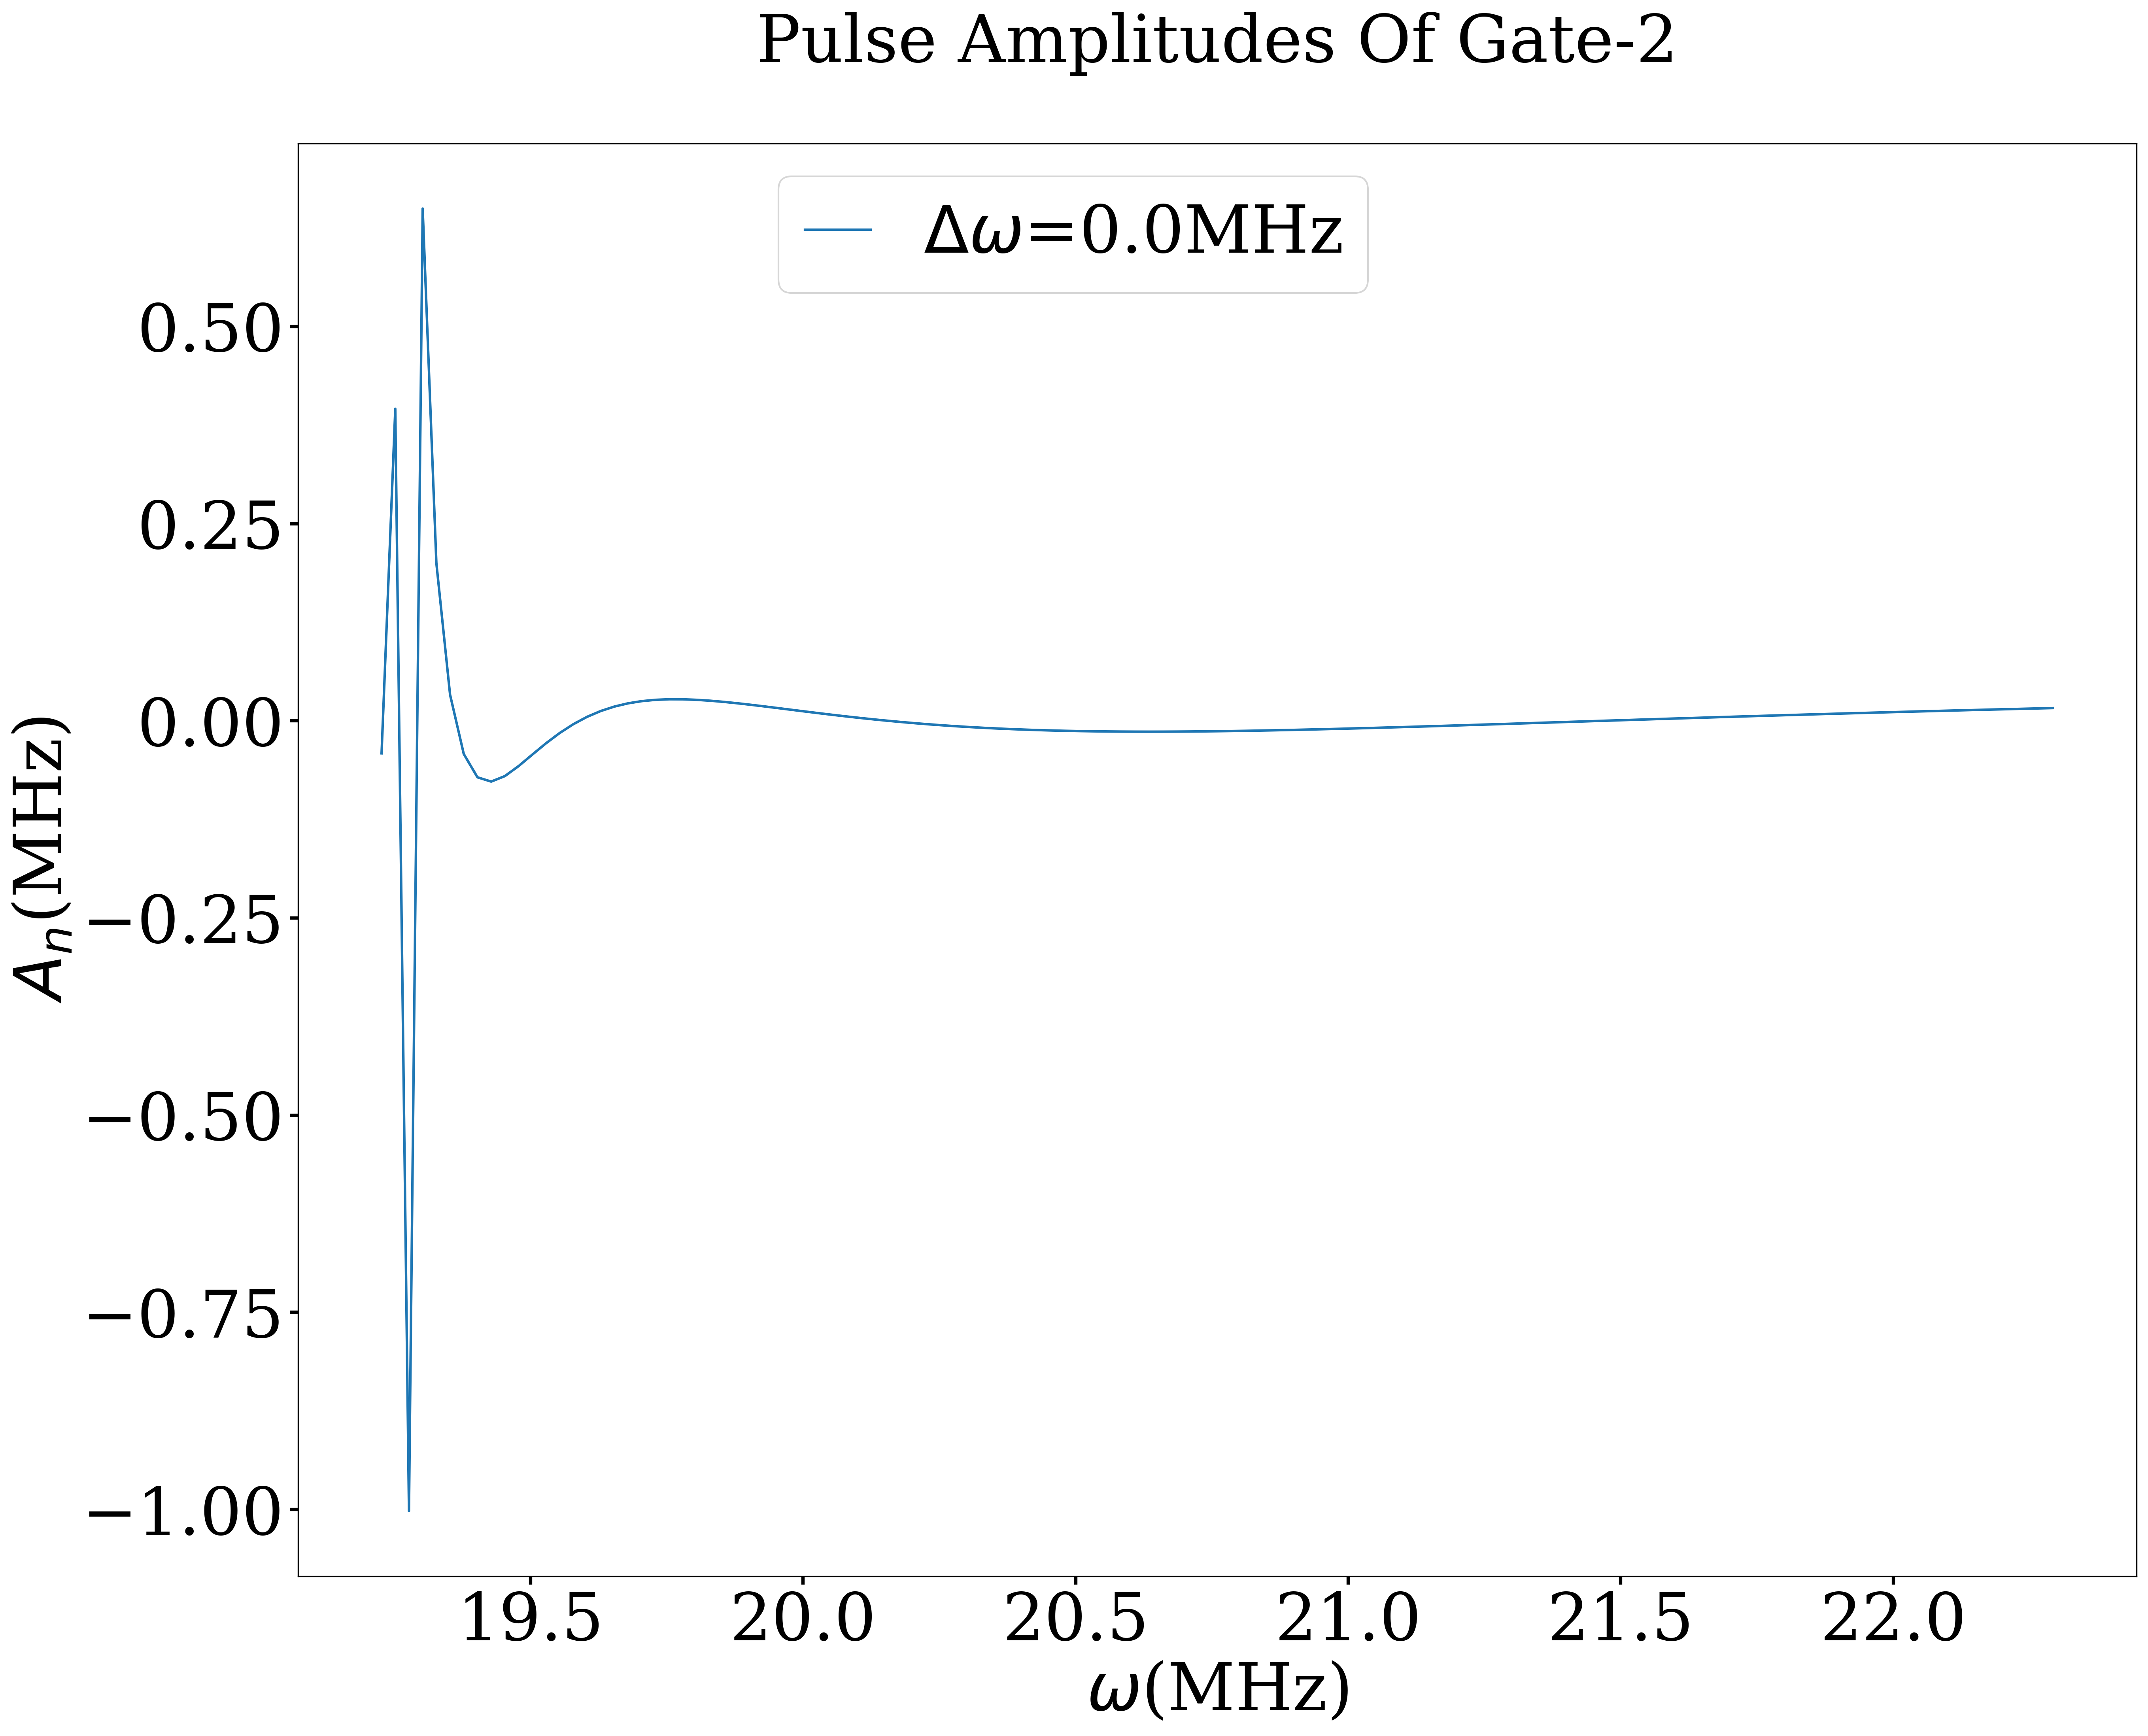

In [796]:
fnsz=40
plt.figure(figsize=(20, 16), dpi=300) 

for i in range(1):
    s=0.003*i*5
    plt.plot(freq_q4q5[i*5],amp_q4q5[i*5],label='$\Delta\omega$='+np.str0(s)+'MHz')

    

lines = plt.gca().get_lines()    
plt.gca().tick_params(axis='x', which='both', length=5, width=2)  # Adjust length and width as needed
plt.gca().tick_params(axis='y', which='both', length=5, width=2)  # Adjust length and width as needed

plt.tick_params(axis='both', which='major', labelsize=fnsz) 
plt.ylabel('$A_n$(MHz)', fontsize=fnsz)
plt.xlabel('$\omega$(MHz)', fontsize=fnsz)
plt.legend(fontsize=fnsz,loc='upper right', bbox_to_anchor=(0.6, 1.0), ncol=1, columnspacing=0.1,handlelength=1)
plt.title('Pulse Amplitudes Of Gate-2',fontsize=fnsz,loc='center',y=1.05)
#plt.xlim([3*10**8,1200*10**9])
#plt.ylim([1e22, 1.25e40])
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

save_dir='/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/Figures'
plt.savefig(os.path.join(save_dir,'amp_q4q5.png'), dpi=300, bbox_inches='tight') 
plt.show()

In [306]:
max(np.real(amp_q4q5[0]))

1.006695178838064

In [98]:
np.pi/8

0.39269908169872414

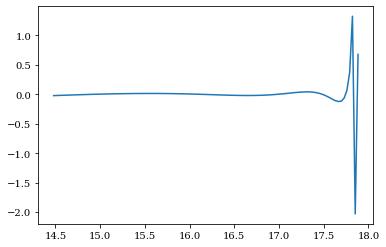

In [66]:
plt.plot(freq_q1q2[100],amp_q1q2[100])

In [38]:
freq_q1q2[0][2]

(15.167805264620927+0j)

In [798]:
power_q1q2=[np.sqrt(np.sum(abs(amp_q1q2[i][j])**2 for j in range(len(amp_q1q2)))) for i in range(n_shift)]
power_q4q5=[np.sqrt(np.sum(abs(amp_q4q5[i][j])**2 for j in range(len(amp_q4q5)))) for i in range(n_shift)]
power_total=[power_q1q2[i]+power_q4q5[i] for i in range(n_shift)]

<ipython-input-798-914be836f783>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  power_q1q2=[np.sqrt(np.sum(abs(amp_q1q2[i][j])**2 for j in range(len(amp_q1q2)))) for i in range(n_shift)]


IndexError: list index out of range

In [107]:
t0=time.time()
print(g45(13,0))
t1=time.time()
print(t1-t0)

(-0.03170738571725645+0j)
0.0006380081176757812


No handles with labels found to put in legend.


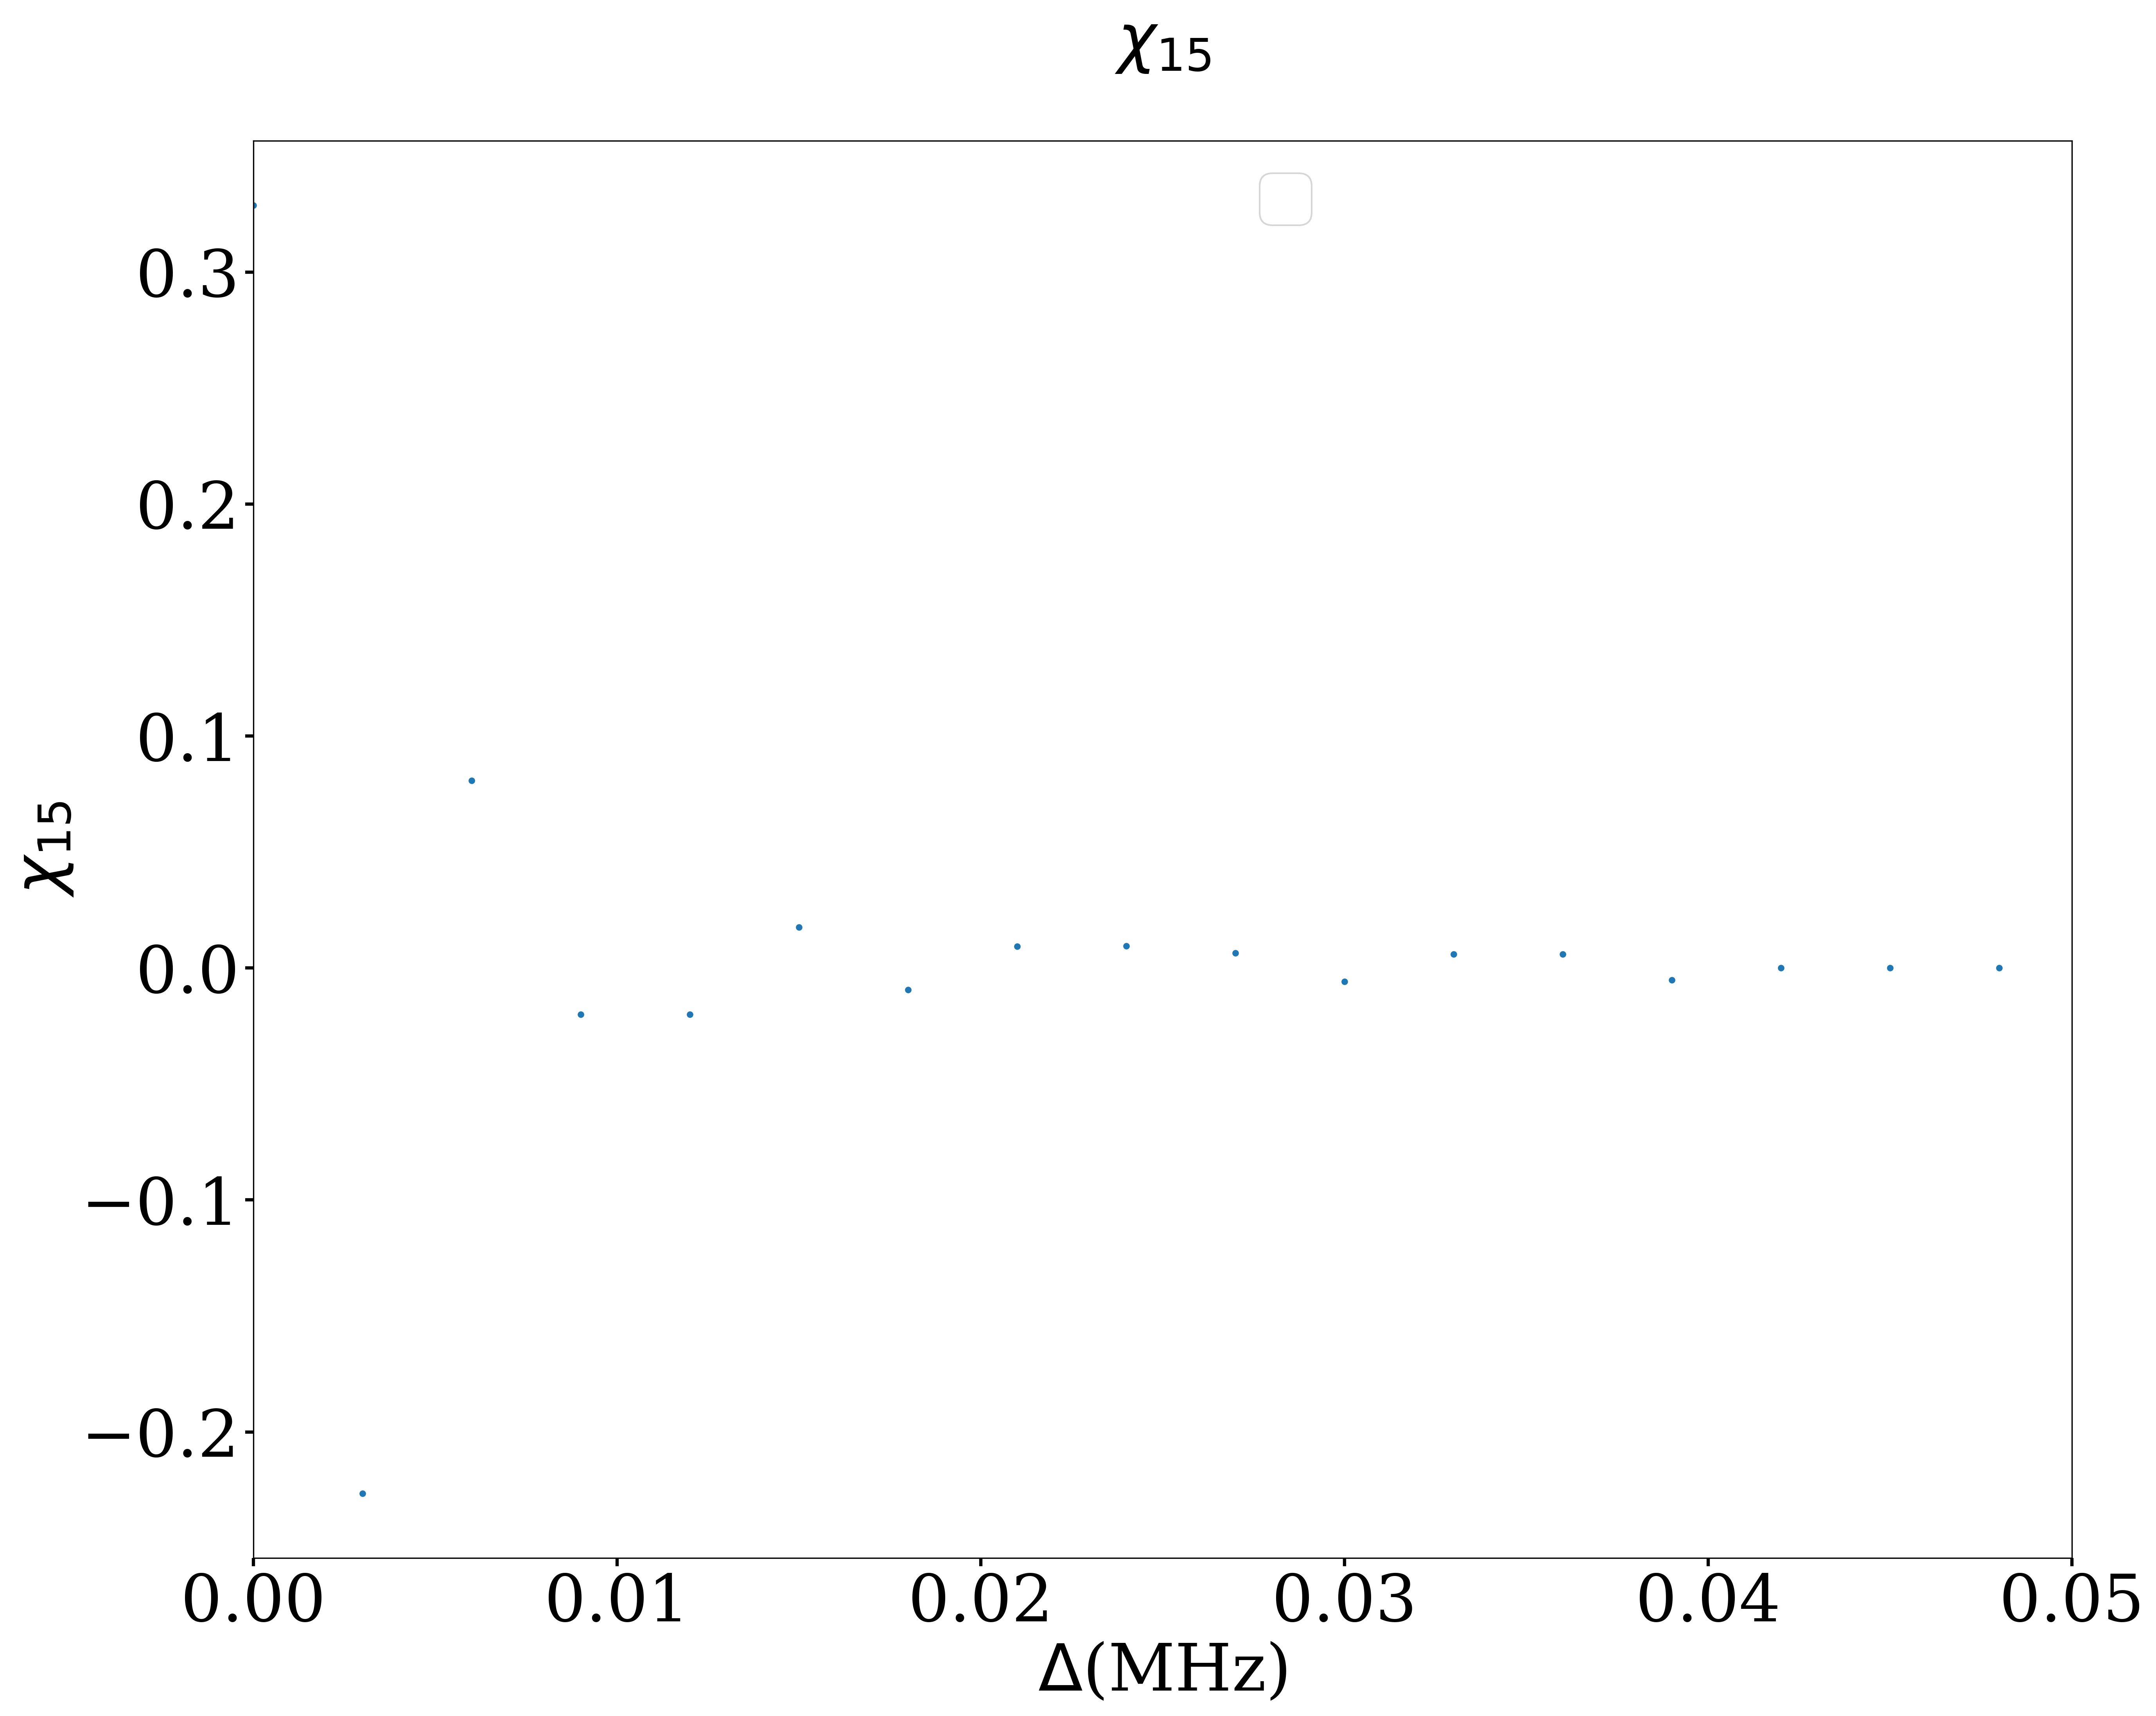

In [802]:
fnsz=40
plt.figure(figsize=(20, 16), dpi=300) 
detuning=[wf_q4q5-(wf_q1q2-i*0.003) for i in range(n_shift)]


plt.plot(detuning,chi,'.')

    

lines = plt.gca().get_lines()    
plt.gca().tick_params(axis='x', which='both', length=5, width=2)  # Adjust length and width as needed
plt.gca().tick_params(axis='y', which='both', length=5, width=2)  # Adjust length and width as needed

plt.tick_params(axis='both', which='major', labelsize=fnsz) 
plt.ylabel('$\chi_{15}$', fontsize=fnsz)
plt.xlabel('$\Delta$(MHz)', fontsize=fnsz)
plt.legend(fontsize=fnsz,loc='upper right', bbox_to_anchor=(0.6, 1.0), ncol=1, columnspacing=0.1,handlelength=1)
plt.title('$\chi_{15}$',fontsize=fnsz,loc='center',y=1.05)
#plt.xlim([3*10**8,1200*10**9])
#plt.ylim([1e22, 1.25e40])
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.xlim([0,0.05])
save_dir='/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/Figures'
plt.savefig(os.path.join(save_dir,'chivsDet.png'), dpi=300, bbox_inches='tight') 
plt.show()

In [159]:
s2=[g12(i*delta_tau,250) for i in range(1001)]

No handles with labels found to put in legend.


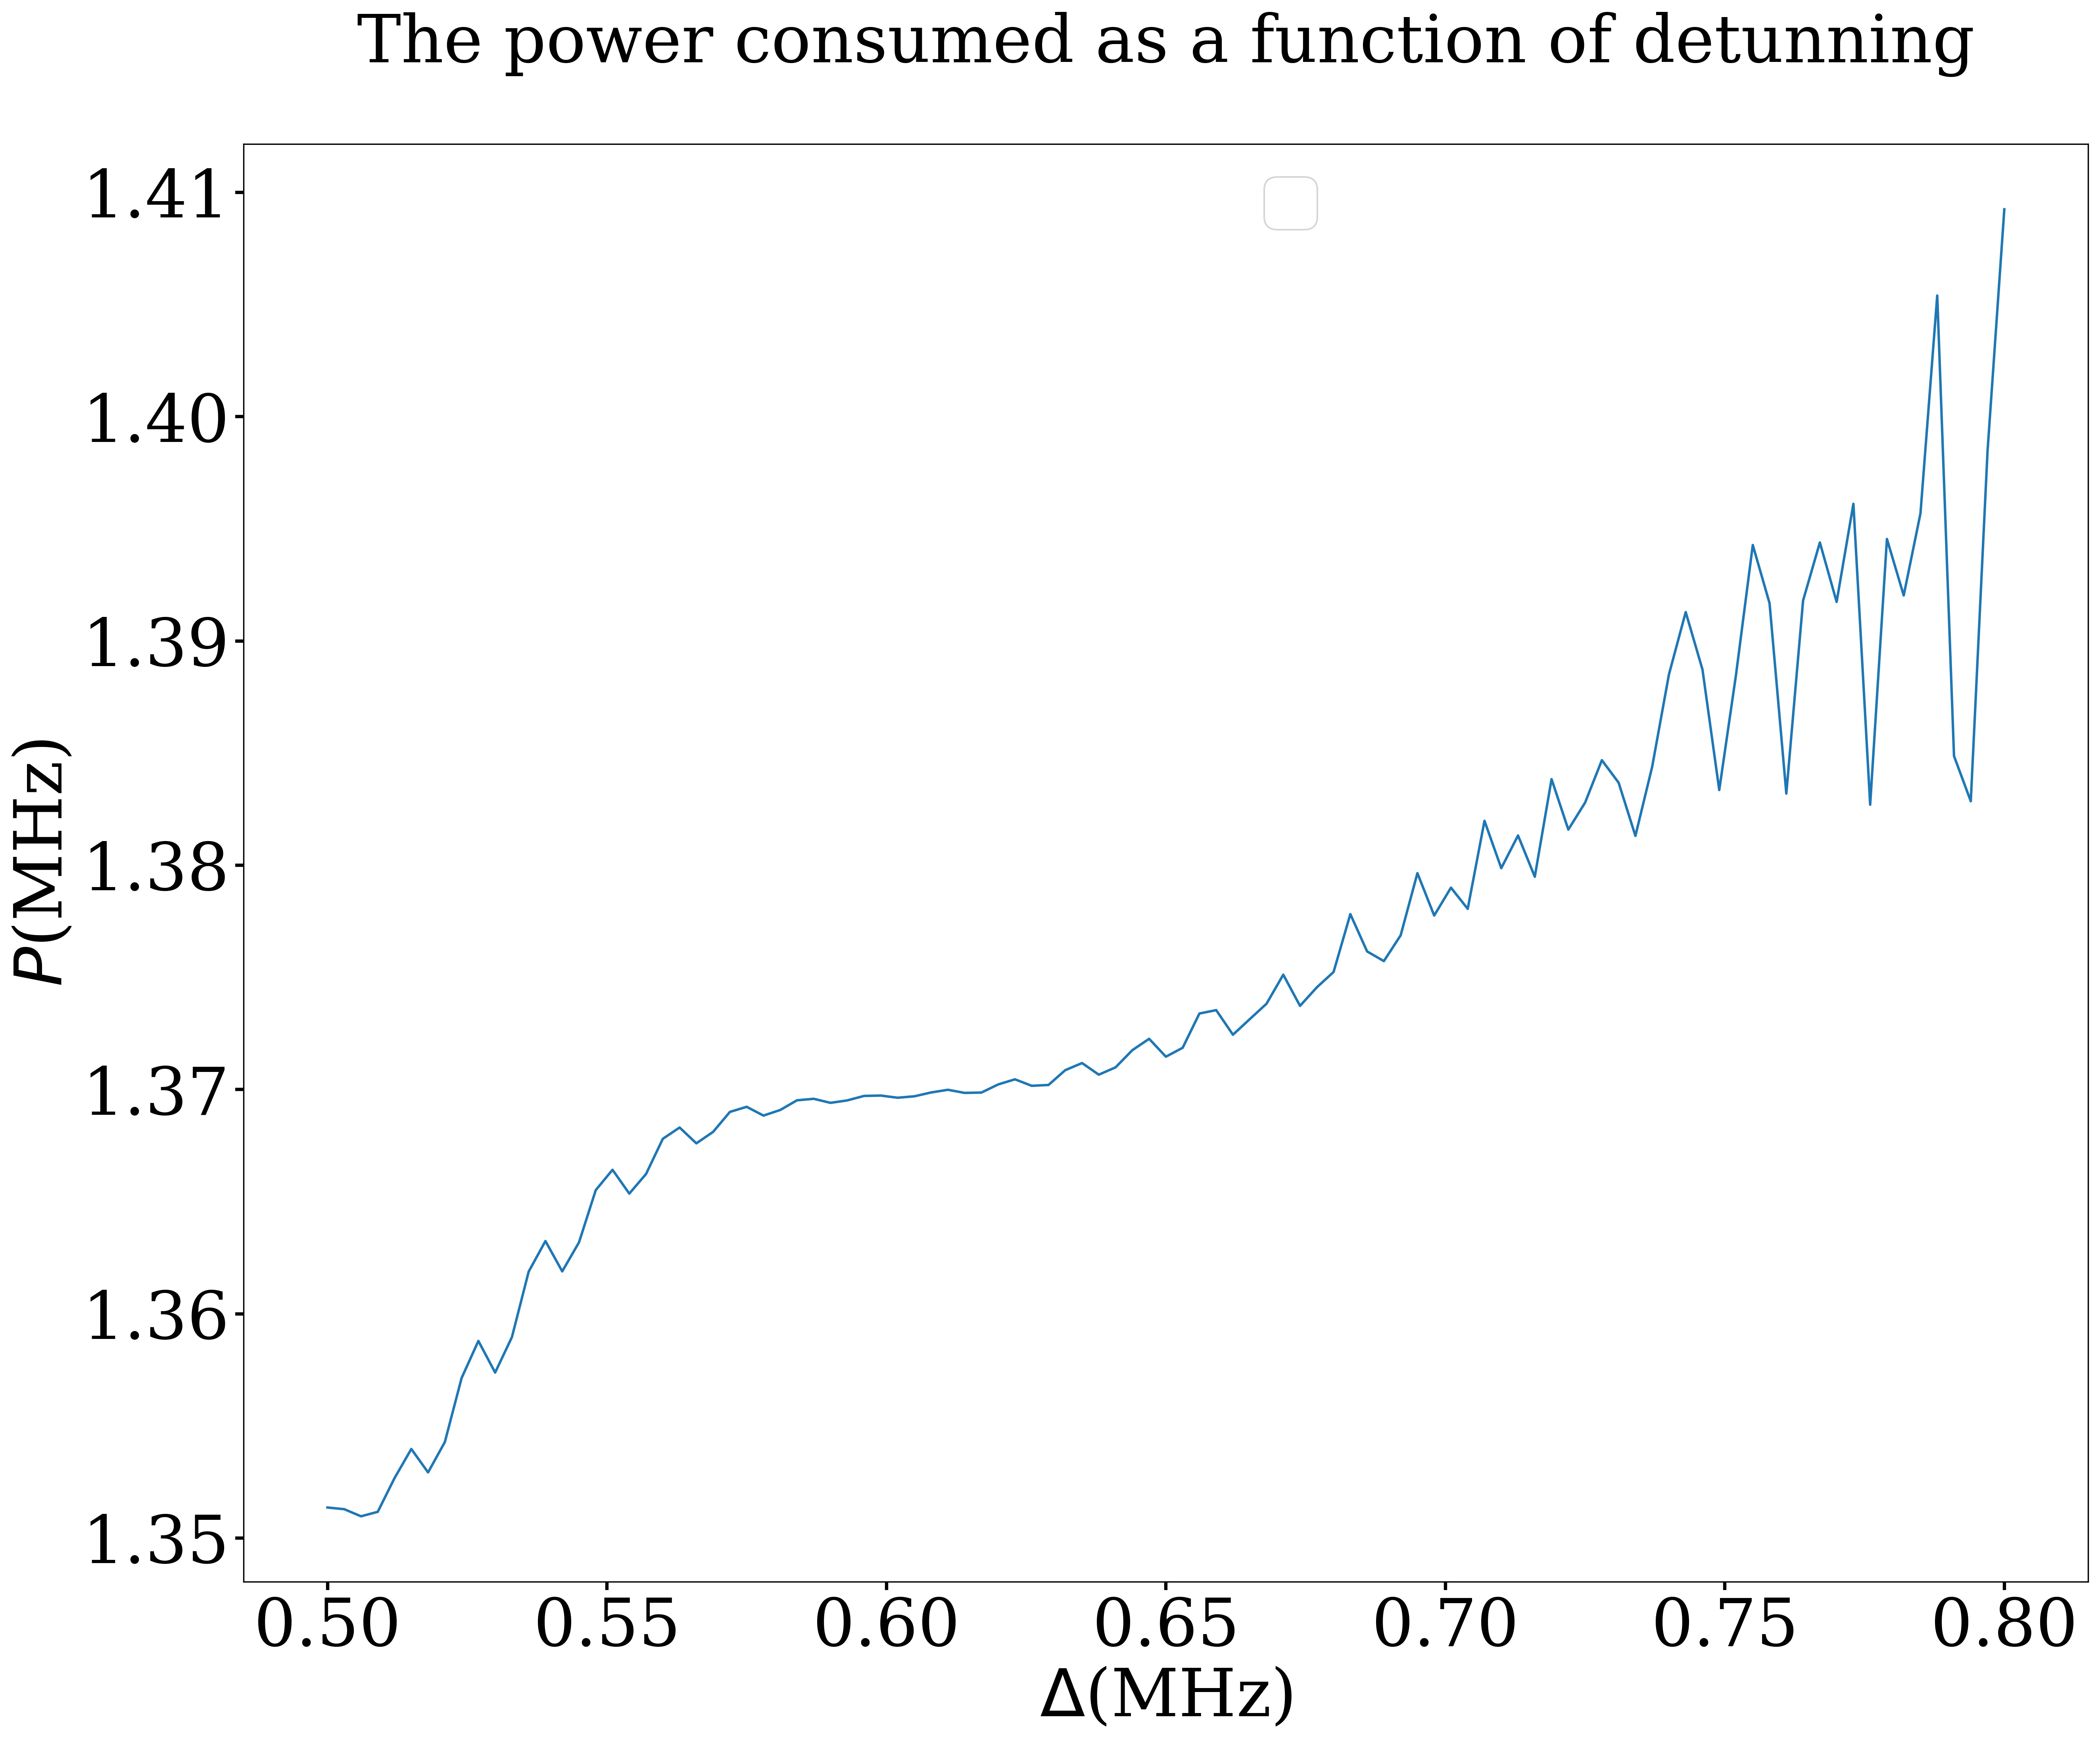

In [718]:
fnsz=40
plt.figure(figsize=(20, 16), dpi=300) 
detuning=[wf_q4q5-(wf_q1q2-i*0.003) for i in range(n_shift)]


plt.plot(detuning,power_total)

    

lines = plt.gca().get_lines()    
plt.gca().tick_params(axis='x', which='both', length=5, width=2)  # Adjust length and width as needed
plt.gca().tick_params(axis='y', which='both', length=5, width=2)  # Adjust length and width as needed

plt.tick_params(axis='both', which='major', labelsize=fnsz) 
plt.ylabel('$P$(MHz)', fontsize=fnsz)
plt.xlabel('$\Delta$(MHz)', fontsize=fnsz)
plt.legend(fontsize=fnsz,loc='upper right', bbox_to_anchor=(0.6, 1.0), ncol=1, columnspacing=0.1,handlelength=1)
plt.title('The power consumed as a function of detunning',fontsize=fnsz,loc='center',y=1.05)
#plt.xlim([3*10**8,1200*10**9])
#plt.ylim([1e22, 1.25e40])
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

save_dir='/Users/masoudma/Documents/Projects and Exams/Projects/Universal gate pulse/Figures'
plt.savefig(os.path.join(save_dir,'PvsDet.png'), dpi=300, bbox_inches='tight') 
plt.show()

In [666]:
tau_test=10
def sum_sss_int(w1,w2,tau):
    return np.sum([sss_int(w1,w2,mode_freq[p],tau) for p in range(1)])

In [667]:
s=np.zeros((len(np.arange(15,25,0.01)),len(np.arange(15,25,0.01))),dtype=complex)

In [668]:
for i in range(len(np.arange(15,25,0.01))):
    for j in range(len(np.arange(15,25,0.01))):
        s[i][j]=sum_sss_int(15+0.01*i,15+0.01*j,tau_test)

We are going to evaluate the following function in a discrete set of frequencies:
$$F(n,m)=\int_{0}^{\tau}\sin{(2 n \pi t_1/\tau)}\int_{0}^{t1}\sin(2 m \pi t_2/\tau) \sin(\omega_p(t_1-t_2))dt_2 dt_1$$
This is an analytical integral, whose result is:
$$
F(n,m) = 
\begin{cases}
   \frac{\tau ^2 \left(-4 \pi ^2 n^2 \tau  \omega _p-8 \pi ^2 n^2 \sin \left(\tau  \omega
   _p\right)+\tau ^3 \omega _p^3\right)}{2 \left(\tau ^2 \omega _p^2-4 \pi ^2
   n^2\right){}^2} & \text{m=n} \\
    -\frac{4 \pi ^2 m n \tau ^2 \sin \left(\tau  \omega _p\right)}{\left(4 \pi ^2 m^2-\tau ^2
   \omega _p^2\right) \left(4 \pi ^2 n^2-\tau ^2 \omega _p^2\right)} & \text{m $\neq$ n} 
\end{cases}
$$

In [738]:
def sss_int_disc(n1, n2, wp, Tau):
    w1=2*np.pi*n1/Tau
    w2=2*np.pi*n2/Tau
    if np.round(np.real(w1 * Tau / (2 * np.pi))) == np.round(np.real(w2 * Tau / (2 * np.pi))):
        x=((Tau * wp * (w1**2 - wp**2) + 2 * w1**2 * np.sin(Tau * wp)) / 
                 (2 * (w1**2 - wp**2)**2))
    else:
        x=-(w1 * w2 * np.sin(Tau * wp)) / ((w1**2 - wp**2) * (-w2**2 + wp**2))
    return x    

In [728]:
test=[sss_int_disc(i,740,mode_freq[0],tau) for i in np.arange(700,750,1)]

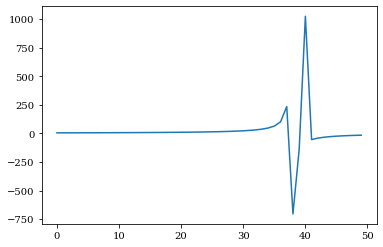

In [730]:
plt.plot(test)

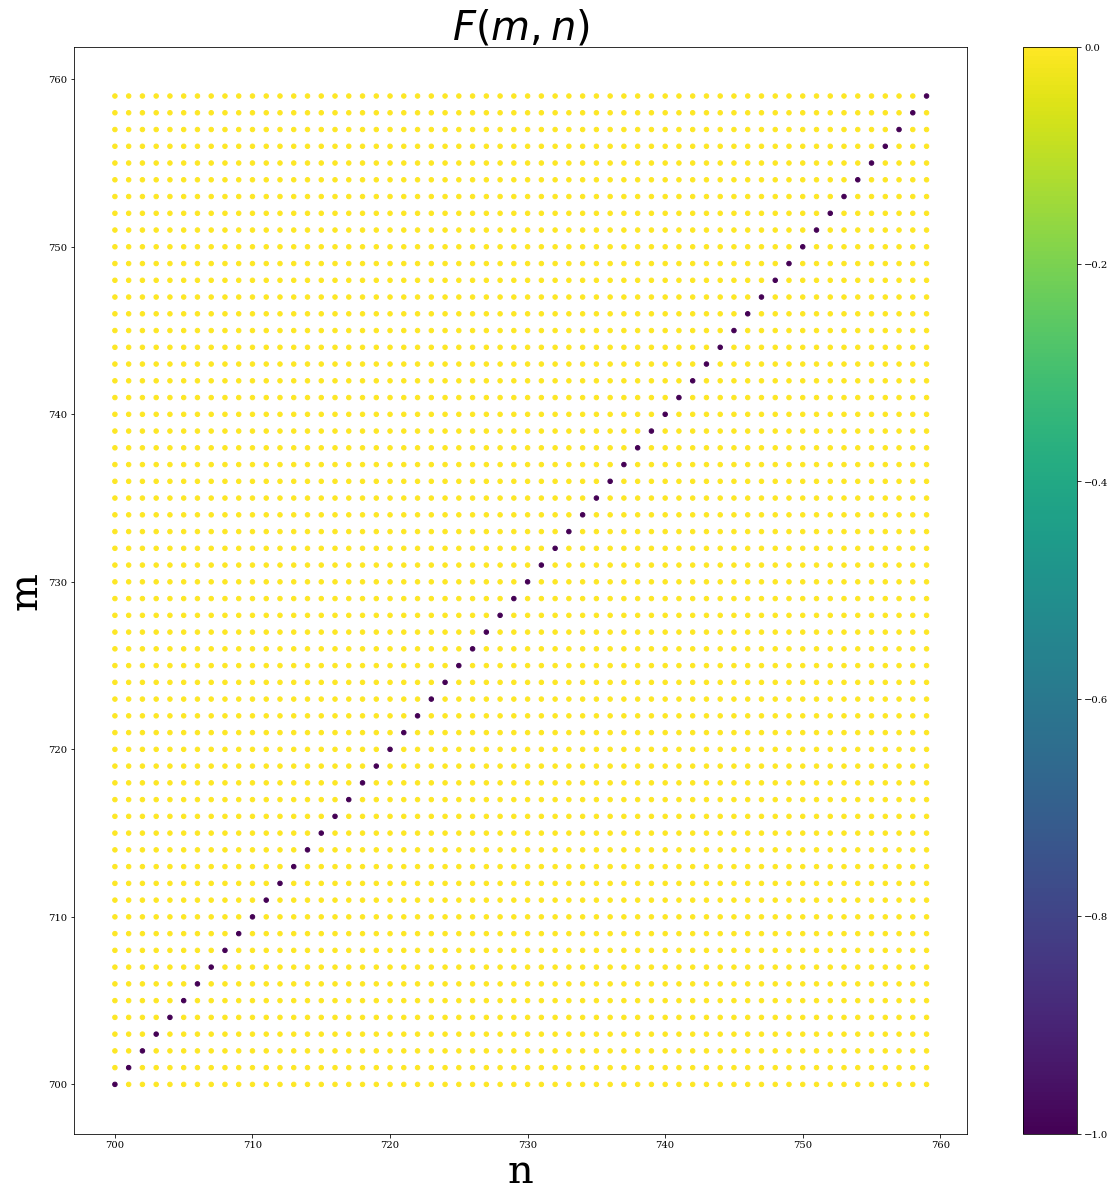

In [777]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
x,y=np.meshgrid(np.arange(700,760,1),np.arange(700,760,1))
z=x*0
for i in range(len(x[0])):
    for j in range(len(x[0])):
        z[i][j]=sss_int_disc(i,j,mode_freq[0],50)



   
scatter=ax.scatter(x,y,s=20,c=z, marker = 'o', cmap = 'viridis');
colorbar = plt.colorbar(scatter, ax=ax)
plt.xlabel('n',fontsize=40)
plt.ylabel('m',fontsize=40)
plt.title('$F(m,n)$',fontsize=40)
plt.show()

In [788]:
sss_int_disc(737,737,mode_freq[0],250)

-4020.318076714527